In [ ]:
import pandas as pd

df = pd.read_csv('crime_new.csv')


In [ ]:
df

,index,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,63726,JA260926,05/12/2017 02:48:00 PM,007XX S OAKLEY BLVD,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,N,N,1225,2.0,04A,1161164.0,1896923.0,41.872842,-87.683759,"(41.872841913, -87.683759297)"
1,250260,JA481296,10/21/2017 10:30:00 PM,013XX W TOUHY AVE,0820,THEFT,$500 AND UNDER,APARTMENT,N,N,2423,49.0,06,NaN,NaN,NaN,NaN,NaN
2,68060,JA266246,05/16/2017 03:00:00 PM,074XX S EBERHART AVE,0460,BATTERY,SIMPLE,STREET,N,N,323,6.0,08B,1180863.0,1855832.0,41.759653,-87.612701,"(41.759653129, -87.612701032)"
3,231760,JA411871,08/30/2017 10:30:00 AM,043XX W NORTH AVE,031A,ROBBERY,ARMED: HANDGUN,ALLEY,N,N,2534,30.0,03,1147450.0,1910287.0,41.909788,-87.733767,"(41.909787953, -87.733767284)"
4,81407,JA339175,07/08/2017 03:03:00 AM,047XX W HARRISON ST,0860,THEFT,RETAIL THEFT,GAS STATION,N,N,1131,24.0,06,1144812.0,1896930.0,41.873185,-87.743795,"(41.873185004, -87.743795434)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92505,170121,JA303513,05/28/2017 10:15:00 AM,003XX E 26TH ST,0820,THEFT,$500 AND UNDER,STREET,N,N,133,2.0,06,1178590.0,1887167.0,41.845691,-87.620078,"(41.845691143, -87.620078491)"
92506,172758,HZ501358,11/01/2016 03:30:00 PM,068XX S STONY ISLAND AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,N,N,332,5.0,04A,1188039.0,1860017.0,41.770969,-87.586268,"(41.770969165, -87.586268228)"
92507,178913,JA161408,02/17/2017 12:01:00 AM,069XX W FOSTER AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,N,Y,1613,41.0,04A,1128816.0,1934125.0,41.975539,-87.801679,"(41.975539249, -87.801678916)"
92508,171839,JA152364,02/13/2017 03:45:00 PM,015XX W GARFIELD BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,N,N,713,16.0,15,1166851.0,1868115.0,41.793670,-87.663704,"(41.793669876, -87.66370422)"


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92510 entries, 0 to 92509
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   92510 non-null  int64  
 1   CASE#                   92510 non-null  object 
 2   DATE  OF OCCURRENCE     92510 non-null  object 
 3   BLOCK                   92510 non-null  object 
 4    IUCR                   92510 non-null  object 
 5    PRIMARY DESCRIPTION    92510 non-null  object 
 6    SECONDARY DESCRIPTION  92510 non-null  object 
 7    LOCATION DESCRIPTION   92190 non-null  object 
 8   ARREST                  92510 non-null  object 
 9   DOMESTIC                92510 non-null  object 
 10  BEAT                    92510 non-null  int64  
 11  WARD                    92510 non-null  float64
 12  FBI CD                  92510 non-null  object 
 13  X COORDINATE            88785 non-null  float64
 14  Y COORDINATE            88785 non-null

<ipython-input-1-14a4c6720d85>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE  OF OCCURRENCE'] = pd.to_datetime(df['DATE  OF OCCURRENCE'], errors='coerce')


Random Forest Metrics:
Accuracy: 0.8046755886837201
Precision: 0.5680473372781065
Recall: 0.027570361860999426
F1 Score: 0.05258833196384552

Gradient Boosting Metrics:
Accuracy: 0.8059178948557231
Precision: 0.6178010471204188
Recall: 0.03388856978747846
F1 Score: 0.06425265450585353


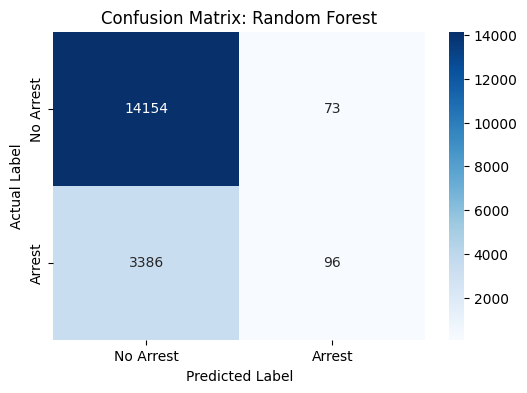

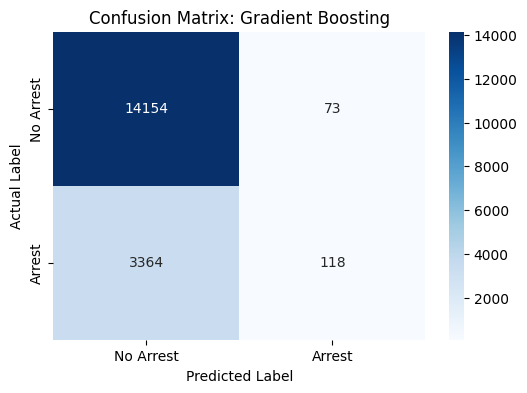

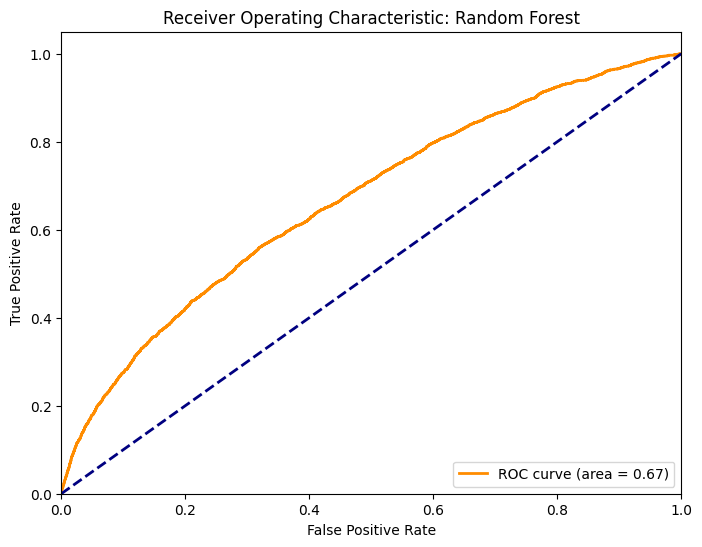

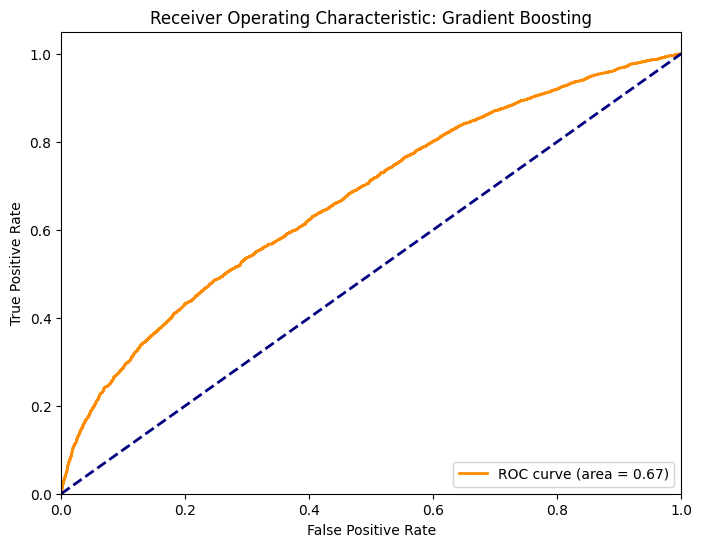

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('crime_new.csv', on_bad_lines='warn')

# Correct errors in location data
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Handle missing data in crime records
df = df.dropna(subset=[' LOCATION DESCRIPTION'])

# Convert 'DATE OF OCCURRENCE' to datetime
df['DATE  OF OCCURRENCE'] = pd.to_datetime(df['DATE  OF OCCURRENCE'], errors='coerce')
df = df.dropna(subset=['DATE  OF OCCURRENCE'])

# Extract temporal features
df['hour'] = df['DATE  OF OCCURRENCE'].dt.hour
df['day_of_week'] = df['DATE  OF OCCURRENCE'].dt.dayofweek

# Drop columns that are not needed for modeling
df = df.drop(columns=['index', 'CASE#', 'BLOCK', ' IUCR', ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION', ' LOCATION DESCRIPTION', 'FBI CD'])

# Encode categorical variables
le_arrest = LabelEncoder()
df['ARREST'] = le_arrest.fit_transform(df['ARREST'])

le_domestic = LabelEncoder()
df['DOMESTIC'] = le_domestic.fit_transform(df['DOMESTIC'])

# Drop rows with missing coordinates
df = df.dropna(subset=['X COORDINATE', 'Y COORDINATE'])

# Define features and target variable
X = df[['hour', 'day_of_week', 'DOMESTIC', 'X COORDINATE', 'Y COORDINATE']]  # Removed 'ARREST' from features
y = df['ARREST']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Save the models
joblib.dump(rf_model, 'random_forest_classifier.pkl')
joblib.dump(gb_model, 'gradient_boosting_classifier.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Model Evaluation on Test Data
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Print Evaluation Metrics
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

print("\nGradient Boosting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

# Confusion Matrix and Visualizations
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Arrest', 'Arrest'], yticklabels=['No Arrest', 'Arrest'])
    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Random Forest Confusion Matrix
plot_confusion_matrix(y_test, y_pred_rf, title="Random Forest")

# Gradient Boosting Confusion Matrix
plot_confusion_matrix(y_test, y_pred_gb, title="Gradient Boosting")

# ROC Curve
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic: {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# ROC Curve for Random Forest
plot_roc_curve(rf_model, X_test, y_test, model_name="Random Forest")

# ROC Curve for Gradient Boosting
plot_roc_curve(gb_model, X_test, y_test, model_name="Gradient Boosting")



In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset

# Define GAN components
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
input_dim = X_train.shape[1]
output_dim = 1
lr = 0.0002
num_epochs = 200

# Initialize models
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(input_dim + output_dim)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

# Prepare data for GAN
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training loop for GAN
for epoch in range(num_epochs):
    for real_data, real_labels in train_loader:
        batch_size = real_data.size(0)

        # Real data
        real_labels = real_labels.view(-1, 1)
        real_input = torch.cat((real_data, real_labels), dim=1)
        real_target = torch.ones(batch_size, 1)

        # Fake data
        noise = torch.randn(batch_size, input_dim)
        fake_labels = generator(noise).detach()
        fake_input = torch.cat((noise, fake_labels), dim=1)
        fake_target = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_input), real_target)
        fake_loss = criterion(discriminator(fake_input), fake_target)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        generated_labels = generator(noise)
        g_input = torch.cat((noise, generated_labels), dim=1)
        g_loss = criterion(discriminator(g_input), real_target)
        g_loss.backward()
        optimizer_G.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}')

# Save the GAN models
torch.save(generator.state_dict(), 'gan_generator.pth')
torch.save(discriminator.state_dict(), 'gan_discriminator.pth')

# Generate synthetic data
with torch.no_grad():
    synthetic_noise = torch.randn(X_train.shape[0], input_dim)
    synthetic_labels = generator(synthetic_noise).numpy()
    synthetic_data = np.hstack((synthetic_noise.numpy(), synthetic_labels))

# Augment original data with synthetic data
augmented_X_train = np.vstack((X_train, synthetic_data[:, :-1]))
augmented_y_train = np.hstack((y_train, synthetic_data[:, -1]))


Epoch 0, D Loss: 0.24191676080226898, G Loss: 5.349244594573975
Epoch 10, D Loss: 0.04372238367795944, G Loss: 44.08631134033203
Epoch 20, D Loss: 0.0437559112906456, G Loss: 46.62834930419922
Epoch 30, D Loss: 0.0031274862121790648, G Loss: 57.13955307006836
Epoch 40, D Loss: 0.013387074694037437, G Loss: 62.491451263427734
Epoch 50, D Loss: 0.0010623557027429342, G Loss: 73.90554809570312
Epoch 60, D Loss: 0.0018583029741421342, G Loss: 75.73160552978516
Epoch 70, D Loss: 0.0007096087210811675, G Loss: 78.60591125488281
Epoch 80, D Loss: 0.00014246891078073531, G Loss: 80.10708618164062
Epoch 90, D Loss: 0.0014888094738125801, G Loss: 84.7794189453125
Epoch 100, D Loss: 0.00013029745605308563, G Loss: 85.92830657958984
Epoch 110, D Loss: 0.00041100941598415375, G Loss: 84.18506622314453
Epoch 120, D Loss: 0.00026500882813706994, G Loss: 93.90474700927734
Epoch 130, D Loss: 0.004232724662870169, G Loss: 87.14209747314453
Epoch 140, D Loss: 0.0010883985087275505, G Loss: 89.98858642578

In [ ]:
# Re-train Random Forest and Gradient Boosting models with augmented data
aug_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
aug_rf_model.fit(augmented_X_train, augmented_y_train)

aug_gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
aug_gb_model.fit(augmented_X_train, augmented_y_train)

# Evaluate models
rf_preds = rf_model.predict(X_test)
aug_rf_preds = aug_rf_model.predict(X_test)

gb_preds = gb_model.predict(X_test)
aug_gb_preds = aug_gb_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Precision:", precision_score(y_test, rf_preds))
print("Random Forest Recall:", recall_score(y_test, rf_preds))
print("Random Forest F1-Score:", f1_score(y_test, rf_preds))

print("Augmented Random Forest Accuracy:", accuracy_score(y_test, aug_rf_preds))
print("Augmented Random Forest Precision:", precision_score(y_test, aug_rf_preds))
print("Augmented Random Forest Recall:", recall_score(y_test, aug_rf_preds))
print("Augmented Random Forest F1-Score:", f1_score(y_test, aug_rf_preds))

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Gradient Boosting Precision:", precision_score(y_test, gb_preds))
print("Gradient Boosting Recall:", recall_score(y_test, gb_preds))
print("Gradient Boosting F1-Score:", f1_score(y_test, gb_preds))

print("Augmented Gradient Boosting Accuracy:", accuracy_score(y_test, aug_gb_preds))
print("Augmented Gradient Boosting Precision:", precision_score(y_test, aug_gb_preds))
print("Augmented Gradient Boosting Recall:", recall_score(y_test, aug_gb_preds))
print("Augmented Gradient Boosting F1-Score:", f1_score(y_test, aug_gb_preds))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Re-train Random Forest and Gradient Boosting models with augmented data
aug_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Convert the target variable to discrete values
augmented_y_train = np.round(augmented_y_train).astype(int)
aug_rf_model.fit(augmented_X_train, augmented_y_train)

aug_gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
aug_gb_model.fit(augmented_X_train, augmented_y_train)

# Evaluate models
rf_preds = rf_model.predict(X_test)
aug_rf_preds = aug_rf_model.predict(X_test)

gb_preds = gb_model.predict(X_test)
aug_gb_preds = aug_gb_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Precision:", precision_score(y_test, rf_preds))
print("Random Forest Recall:", recall_score(y_test, rf_preds))
print("Random Forest F1-Score:", f1_score(y_test, rf_preds))

print("Augmented Random Forest Accuracy:", accuracy_score(y_test, aug_rf_preds))
print("Augmented Random Forest Precision:", precision_score(y_test, aug_rf_preds))
print("Augmented Random Forest Recall:", recall_score(y_test, aug_rf_preds))
print("Augmented Random Forest F1-Score:", f1_score(y_test, aug_rf_preds))

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Gradient Boosting Precision:", precision_score(y_test, gb_preds))
print("Gradient Boosting Recall:", recall_score(y_test, gb_preds))
print("Gradient Boosting F1-Score:", f1_score(y_test, gb_preds))

print("Augmented Gradient Boosting Accuracy:", accuracy_score(y_test, aug_gb_preds))
print("Augmented Gradient Boosting Precision:", precision_score(y_test, aug_gb_preds))
print("Augmented Gradient Boosting Recall:", recall_score(y_test, aug_gb_preds))
print("Augmented Gradient Boosting F1-Score:", f1_score(y_test, aug_gb_preds))

Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-Score: 1.0
Augmented Random Forest Accuracy: 1.0
Augmented Random Forest Precision: 1.0
Augmented Random Forest Recall: 1.0
Augmented Random Forest F1-Score: 1.0
Gradient Boosting Accuracy: 1.0
Gradient Boosting Precision: 1.0
Gradient Boosting Recall: 1.0
Gradient Boosting F1-Score: 1.0
Augmented Gradient Boosting Accuracy: 1.0
Augmented Gradient Boosting Precision: 1.0
Augmented Gradient Boosting Recall: 1.0
Augmented Gradient Boosting F1-Score: 1.0
